# Machine Learning on Prediction for Customer Churn

This project builds on my prior experience with machine learning methods, where I contributed to a group project predicting the success of Kickstarter campaigns. My responsibility was training an XGBoost model. For this solo project, I apply a similar process to address the business-critical problem of customer retention.

# Project Details

In this project, I tackle the challenge of predicting customer churn by building a Customer Churn Prediction model. Customer churn refers to the rate at which customers stop doing business with a company, often measured as the number of customers who leave or fail to renew their subscription. Understanding and predicting churn is crucial for businesses aiming to retain customers and improve long-term growth.

__INFORMATION ON DATA__   
The data is retreived from [Kaggle](https://www.kaggle.com/datasets/willianoliveiragibin/customer-churn) along with the description of the columns. And the dataset is defined as "The Customer Churn Classification dataset is a vital resource for businesses seeking to understand and predict customer churn, a critical metric that represents the rate at which customers stop doing business with a company over a given period. Understanding churn is essential for any customer-focused company, as retaining customers is generally more cost-effective than acquiring new ones. The dataset is designed to provide a detailed view of customer characteristics and behaviors that could potentially lead to churn, allowing companies to take preemptive action to improve customer retention."

__BUSINESS CASE__    
You work as a Data Scientist for a bank that offers one subscription-based package or product per customer.    
You are tasked with developing a predictive model to estimate the likelihood of customer churn.      
This model must identify which customers are at risk of cancelling their subscriptions, given the fluctuations in customer retention that the bank experiences.

# Getting started

Setting the working environment

In [47]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from scipy.stats import chi2_contingency
warnings.filterwarnings('ignore')

# import xgboost as xgb
# from sklearn.datasets import make_classification
# from sklearn.model_selection import train_test_split
# from sklearn.model_selection import RandomizedSearchCV
# from sklearn.preprocessing import StandardScaler
# from sklearn.linear_model import LogisticRegression, LinearRegression
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, r2_score, mean_squared_error, confusion_matrix, log_loss, classification_report, roc_curve
# from xgboost import XGBClassifier
# from xgboost import XGBRegressor
# from sklearn.preprocessing import OneHotEncoder

# Understanding the dataset

This section provides an overview of the dataset, including its structure, the number of rows and columns, and a preview of the data.

In [2]:
# read in csv file and display
df = pd.read_csv("data_churn/customer_churn.csv")
df.head(20)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,EstimatedSalary,Exited
0,747,15787619,Hsieh,844,France,Male,18,2,160980.03,145936.28,0
1,1620,15770309,McDonald,656,France,Male,18,10,151762.74,127014.32,0
2,1679,15569178,Kharlamov,570,France,Female,18,4,82767.42,71811.90,0
3,2022,15795519,Vasiliev,716,Germany,Female,18,3,128743.80,197322.13,0
4,2137,15621893,Bellucci,727,France,Male,18,4,133550.67,46941.41,0
5,2142,15758372,Wallace,674,France,Male,18,7,0.00,55753.12,1
6,3331,15657439,Chao,738,France,Male,18,4,0.00,47799.15,0
7,3513,15657779,Boylan,806,Spain,Male,18,3,0.00,86994.54,0
8,3518,15757821,Burgess,771,Spain,Male,18,1,0.00,41542.95,0
9,3687,15665327,Cattaneo,706,France,Male,18,2,176139.50,129654.22,0


There are two categorical features: `Geography` and `Gender`

In [3]:
# check the columns
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'EstimatedSalary', 'Exited'],
      dtype='object')

Here are the descriptions of the columns:

| Column name | Description |
| --- | ----------- |
| CustomerId | A unique identifier for each customer |
| Surname | Contains the surname of the customer |
| CreditScore | A key financial indicator, the credit score reflects a customer's financial health |
| Geography | The geographical location of customers |
| Gender | Identifies the gender of the customer |
| Age | Contains the age of the customer |
| Tenure | Reflects how long a customer has been with the company (a bank in our case) |
| Balance | The account balance of customers |
| EstimatedSalary | A customer's estimated salary provides an indication of their financial well-being |
| Exited | This is the target column, which indicates whether the customer churned (1 for churned and 0 for not churned) |

In [7]:
# look at the shape of dataset
df.shape

(10000, 11)

There are 10000 rows and 11 columns in our dataset

In [5]:
# check data-types and for possible missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(6), object(3)
memory usage: 859.5+ KB


__Important Notes on Data__     
- There are no missing values.
- Only the `Geography` and `Gender` columns need to be converted into dummy variables. This is necessary to include these features in our analysis and model training.

This will be done in the next steps.

# Explanatory Data Analysis

In [4]:
# check for duplicate rows in CustomerId column
df["CustomerId"].duplicated().value_counts()

CustomerId
False    10000
Name: count, dtype: int64

In [5]:
# drop columns we don't need
df.drop(["RowNumber", "Surname"], axis=1, inplace=True)

In [6]:
# check result
df.head()

,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,EstimatedSalary,Exited
0,15787619,844,France,Male,18,2,160980.03,145936.28,0
1,15770309,656,France,Male,18,10,151762.74,127014.32,0
2,15569178,570,France,Female,18,4,82767.42,71811.90,0
3,15795519,716,Germany,Female,18,3,128743.80,197322.13,0
4,15621893,727,France,Male,18,4,133550.67,46941.41,0


__Future engineering__  
As previously discussed, we must transform the `Geography` and `Gender` categorical columns into a more readable format for model training.   
We can utilise pandas' `get_dummies()` function to achieve this transformation.

In [7]:
# convert categorical to dummies
df_copy = pd.get_dummies(df, drop_first=True)

In [8]:
# check result
df_copy.head()

,CustomerId,CreditScore,Age,Tenure,Balance,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,15787619,844,18,2,160980.03,145936.28,0,False,False,True
1,15770309,656,18,10,151762.74,127014.32,0,False,False,True
2,15569178,570,18,4,82767.42,71811.90,0,False,False,False
3,15795519,716,18,3,128743.80,197322.13,0,True,False,False
4,15621893,727,18,4,133550.67,46941.41,0,False,False,True


In cases where the `Geography_Germany` and `Geography_Spain` columns contain only `False` values, the customer's location is identified as `France` and the same approach is applied to the `Gender` column, where `False` represents `Female`.

In [9]:
# get an overview with the describe() function

df.describe()

,CustomerId,CreditScore,Age,Tenure,Balance,EstimatedSalary,Exited
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,199992.480000,1.000000


Let's take a moment to visualise this table and all these numbers.

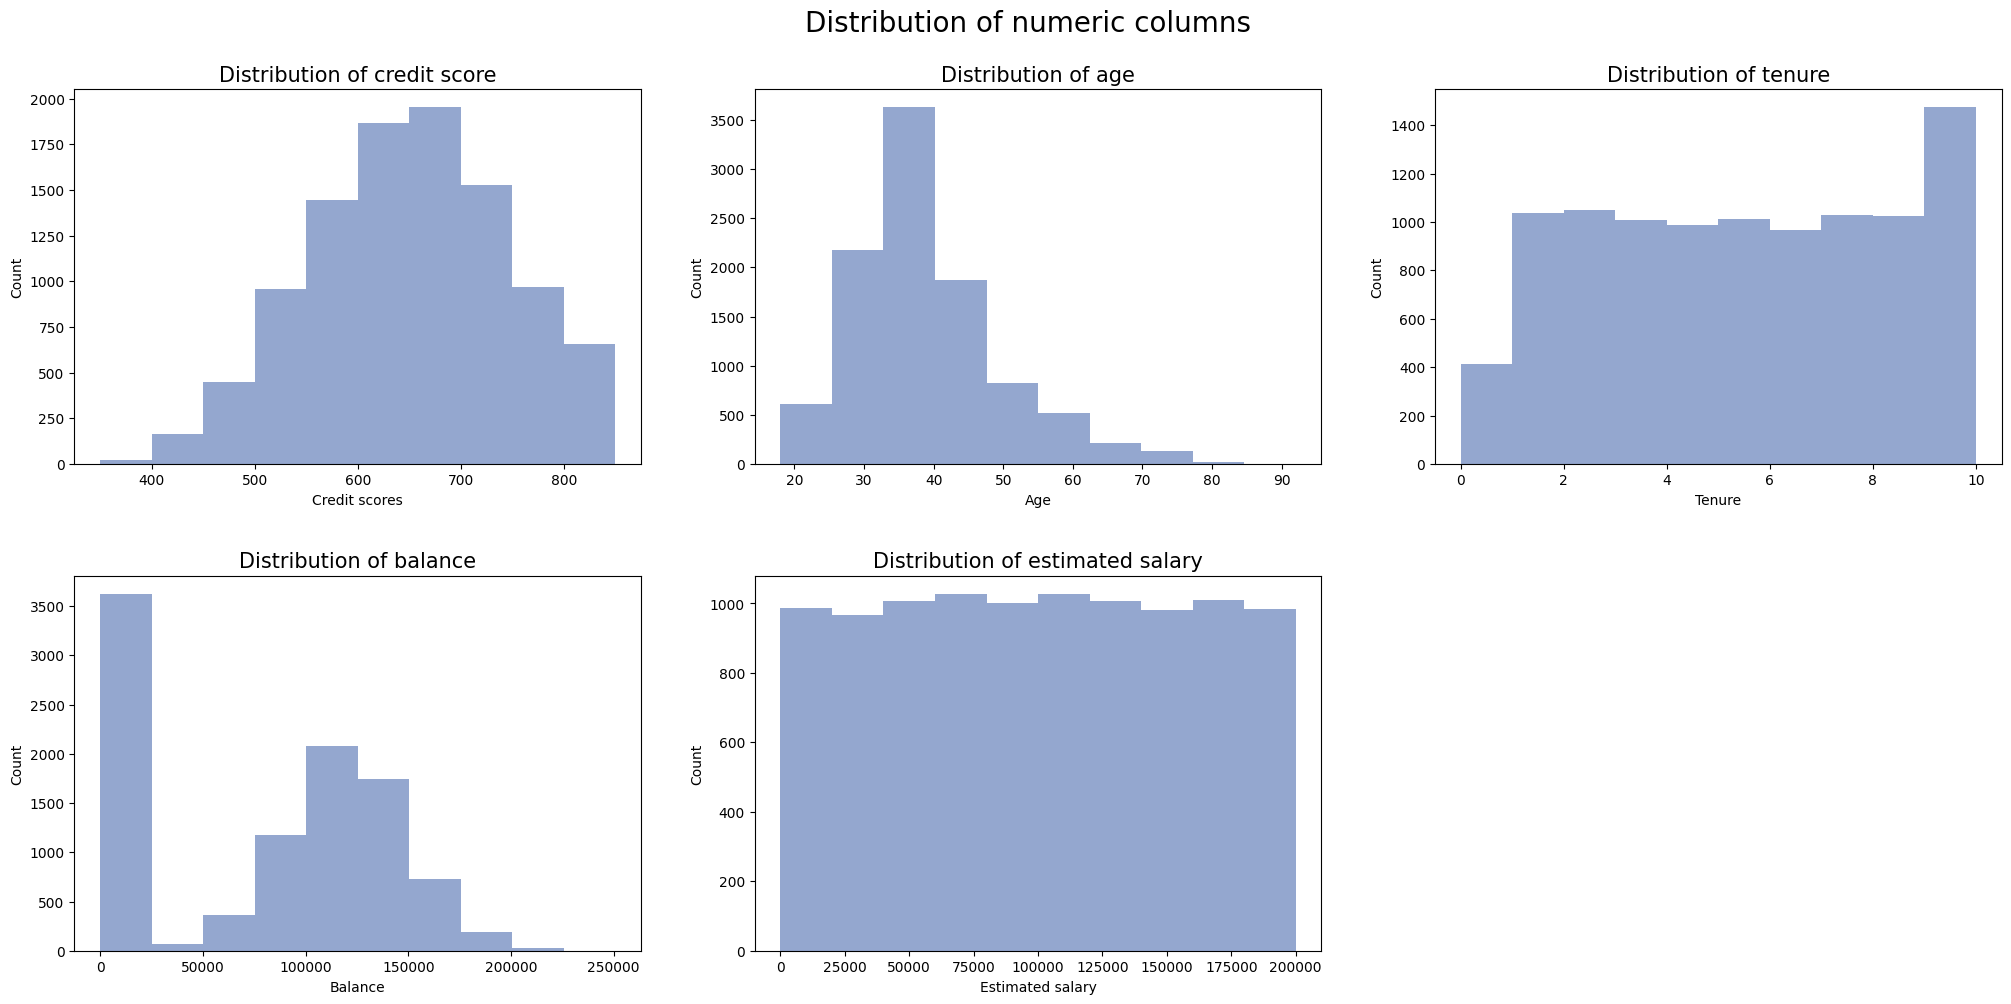

In [73]:
color = sns.color_palette('BuPu', 8)[3]

fig, ax = plt.subplots(2,3, figsize=(20,10)) 
plt.suptitle('Distribution of numeric columns', fontsize=20)
fig.tight_layout() 
plt.subplots_adjust(hspace = .3, wspace = .2, top = .9) 

ax[0][0].hist(x=df['CreditScore'], color=color)
ax[0][0].set(xlabel="Credit scores", ylabel="Count") 
ax[0][0].set_title("Distribution of credit score", fontsize = 15);  

ax[0][1].hist(x= df['Age'], color=color)
ax[0][1].set(xlabel="Age", ylabel="Count")
ax[0][1].set_title("Distribution of age", fontsize = 15);

ax[0][2].hist(x=df['Tenure'], color=color)
ax[0][2].set(xlabel="Tenure", ylabel="Count")
ax[0][2].set_title("Distribution of tenure", fontsize = 15);

ax[1][0].hist(x=df['Balance'], color=color)
ax[1][0].set(xlabel="Balance", ylabel="Count")
ax[1][0].set_title("Distribution of balance", fontsize = 15);
                              
ax[1][1].hist(x=df['EstimatedSalary'], color=color)
ax[1][1].set(xlabel="Estimated salary", ylabel="Count")
ax[1][1].set_title("Distribution of estimated salary", fontsize = 15);

fig.delaxes(ax[1][2]);

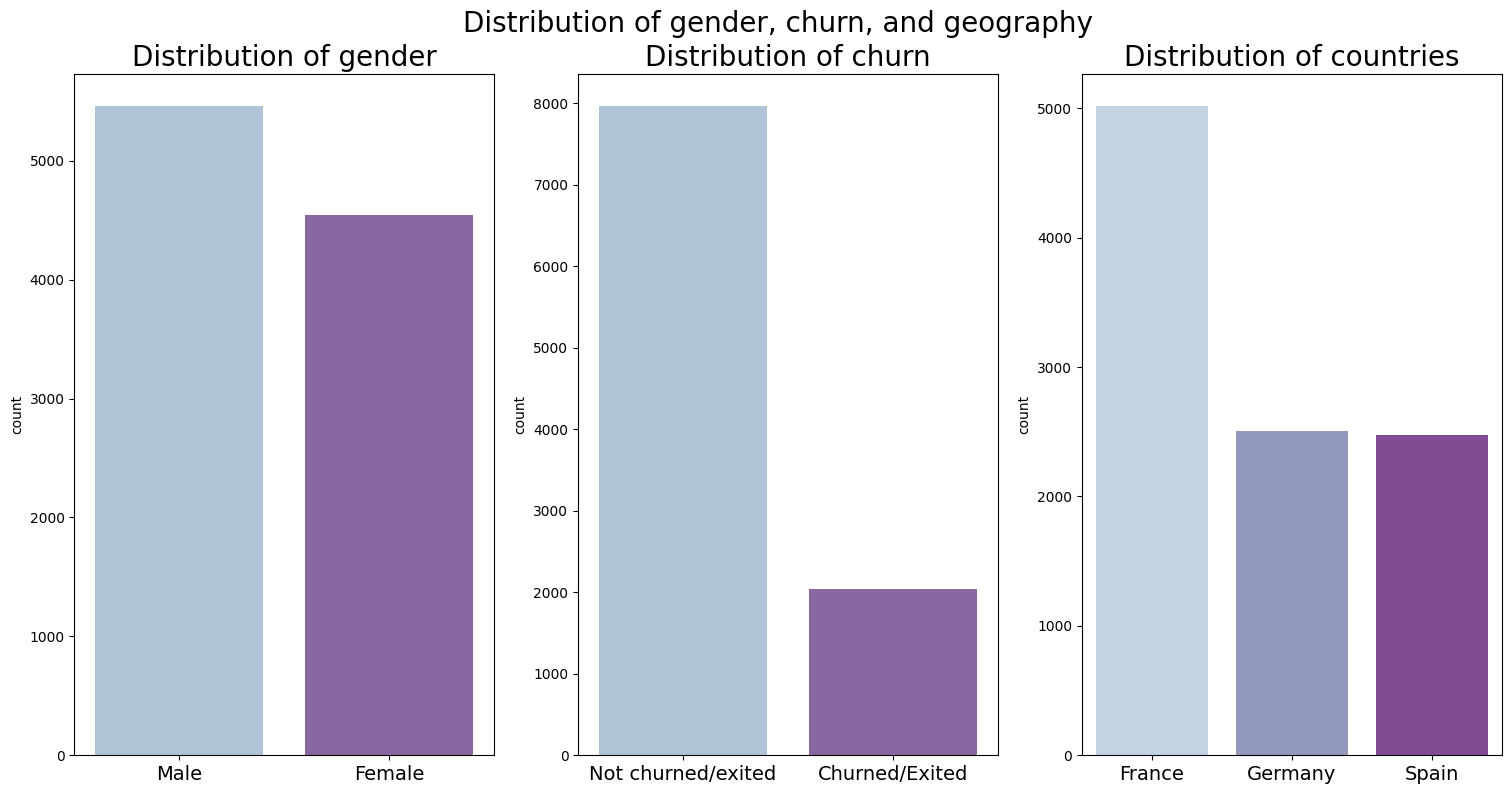

In [27]:
fig, ax = plt.subplots(1,3, figsize=(15,8)) 
plt.suptitle('Distribution of gender, churn, and geography', fontsize=20)
fig.tight_layout() 
plt.subplots_adjust(hspace = .5, wspace = .2, top = .9) 
 
f1 = sns.countplot(x=df['Gender'], ax=ax[0], palette='BuPu') 
f1.tick_params(axis='x', labelsize=14)
f1.set(xlabel=None) 
f1.set_title('Distribution of gender', fontsize=20); 
 
f2 = sns.countplot(x=df['Exited'], ax=ax[1], palette='BuPu') 
f2.tick_params(axis='x') 
f2.set_xticks([0,1])
f2.set_xticklabels(labels=["Not churned/exited", "Churned/Exited"], fontsize=14)
f2.set(xlabel=None) 
f2.set_title('Distribution of churn', fontsize=20); 

f3 = sns.countplot(x=df['Geography'], ax=ax[2], palette='BuPu') 
f3.tick_params(axis='x', labelsize=14) 
f3.set(xlabel=None) 
f3.set_title('Distribution of countries', fontsize=20); 


In [28]:
# showcase the correlation matrix between these variables
corr_columns=["CreditScore", "Age", "Tenure", "Balance", "EstimatedSalary", "Exited"]
corr_mtrx=df[corr_columns].corr()
corr_mtrx

,CreditScore,Age,Tenure,Balance,EstimatedSalary,Exited
CreditScore,1.000000,-0.003965,0.000842,0.006268,-0.001384,-0.027094
Age,-0.003965,1.000000,-0.009997,0.028308,-0.007201,0.285323
Tenure,0.000842,-0.009997,1.000000,-0.012254,0.007784,-0.014001
Balance,0.006268,0.028308,-0.012254,1.000000,0.012797,0.118533
EstimatedSalary,-0.001384,-0.007201,0.007784,0.012797,1.000000,0.012097
Exited,-0.027094,0.285323,-0.014001,0.118533,0.012097,1.000000


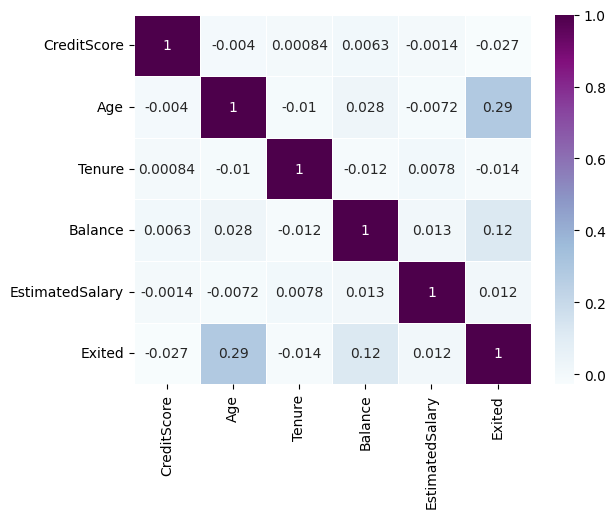

In [34]:
# draw a heatmap 
plt.figure()
ax = sns.heatmap(corr_mtrx, linewidths=.5, annot=True, cmap='BuPu')

This heatmap indicates that the relationships between the features of our dataset are not particularly strong. However, to make accurate predictions, we need to gain a more comprehensive understanding of our dataset.

#### What can we understand from the tables?

The descriptive statistics offer a useful overview of the dataset, providing insights into customer characteristics and behaviours. The following points are worthy of note:

__1. Customer behaviour:__

- __`Exited` (Churn):__ The average value of __0.2037__ indicates that __approaximately 20% of customers have canceled their subscriptions or did not renew them__. This suggests a notable churn rate that requires further investigation.

- __`Balance`:__ The average account balance is __76,458.89__, with a wide range from __0 to 250,898.09__. Interestingly, the 25th percentile is __0__, meaning a significant portion of customers have no balance in their accounts. This could indicate low engagement or specific banking habits.

- __`Tenure`:__ Customers stay with the bank for an average of __5 years__, with a median tenure of __5 years__. The range spans from __0 to 10 years__, reflecting varying levels of loyalty.


__2. Customer demographics:__

- __`Age`:__ The average age is __39 years__, with customers ranging from __18 to 92 years old__. The 25th and 75th percentiles (32 and 44 years) show that most customers fall within a middle-agged demographic.

- __`CreditScore`:__ The average credit score is __650.53__, with most customers scoring between __584 (25th percentile) and 718 (75th percentile)__. This indicates a predominantly moderate credit profile.

- __`EstimatedSalary`:__ Customers have an average estimated salary of __100,090__, with significant variability (standard deviation = __57,510.49__). Salaries range from __11.58 to 199,992.48__, reflecting a diverse income group.

__3. Important notes:__

- __Churn Drivers:__ The churn rate is a key focus for the project. Features like `Balance`, `Tenure`, and `Age` may provide predictive insights into customer retention. However, the data set is unbalanced, with a churn rate of 20%, this will be dealt with in the coming steps.

- __Zero Balances:__ A large number of customers (at least 25%) have no balance, which could impact their likelihood of churning.

- __Wide Ranges:__ Features like `EstimatedSalary` and `Age` show substantial variation, which may introduce challenges in model training but also opportunities to uncover interesting patterns.

# Hypotheses

In the light of above showcased results and interpretations, now we can formulate some hypotheses;

1. Customers with higher tenure are less likely to churn.
2. Customers with lower balances are more likely to churn.
3. Customers with lower estimated salaries are more likely to churn.
4. Customers older than 35 are less likely to churn.
5. Customers with higher credit scores are less likely to churn.
6. Customer churn is less likely influenced by customer's gender.
7. Customer churn is less likely influenced by the customer's geographic region of origin.

Once these hypotheses have been tested, we will have a comprehensive understanding of the data. This will enable us to prepare the data for model training, thus enabling us to make predictions.

# Testing Hypotheses

__1. Customers with higher tenure less likely to churn.__

Let's first check the distribution of the length of subscribtion years.

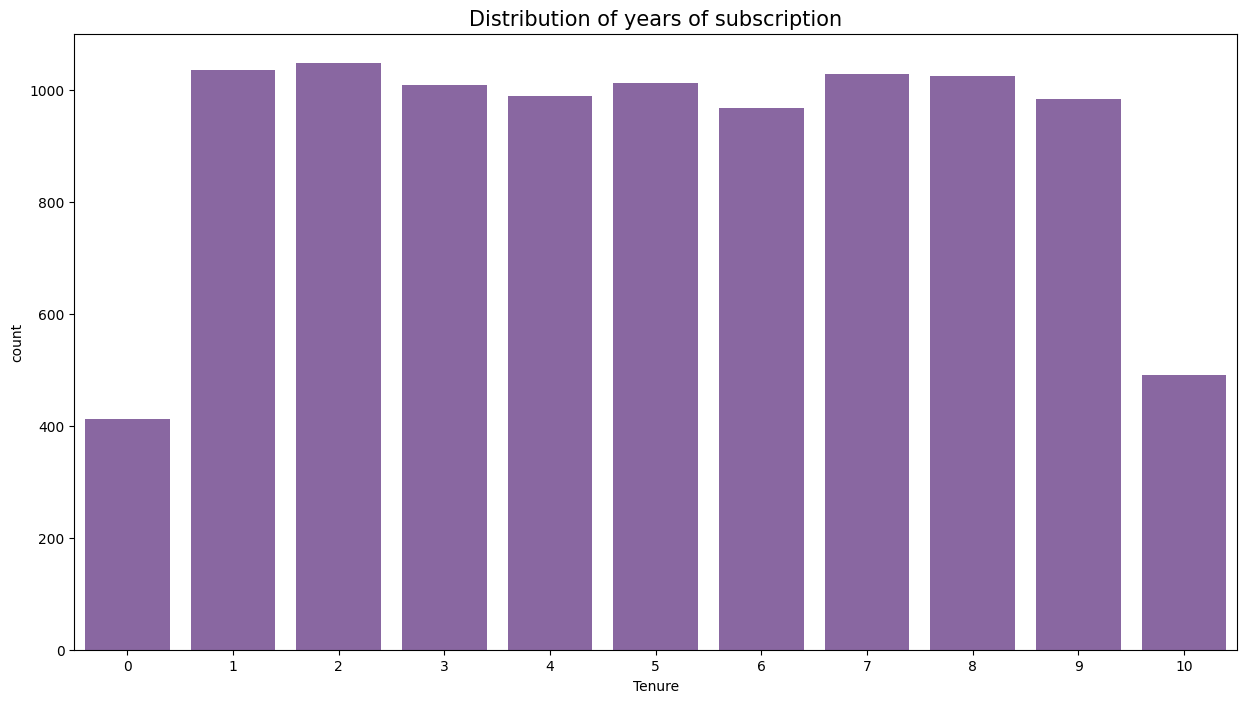

In [45]:
color = sns.color_palette('BuPu', 8)[5]

plt.figure(figsize=(15,8))
f1 = sns.countplot(x=df['Tenure'], color=color) 
f1.tick_params(axis='x') 
f1.set(xlabel="Tenure") 
f1.set_title('Distribution of years of subscription', fontsize=15); 

Now we can see the relationship between `Tenure` and `Exited`. 

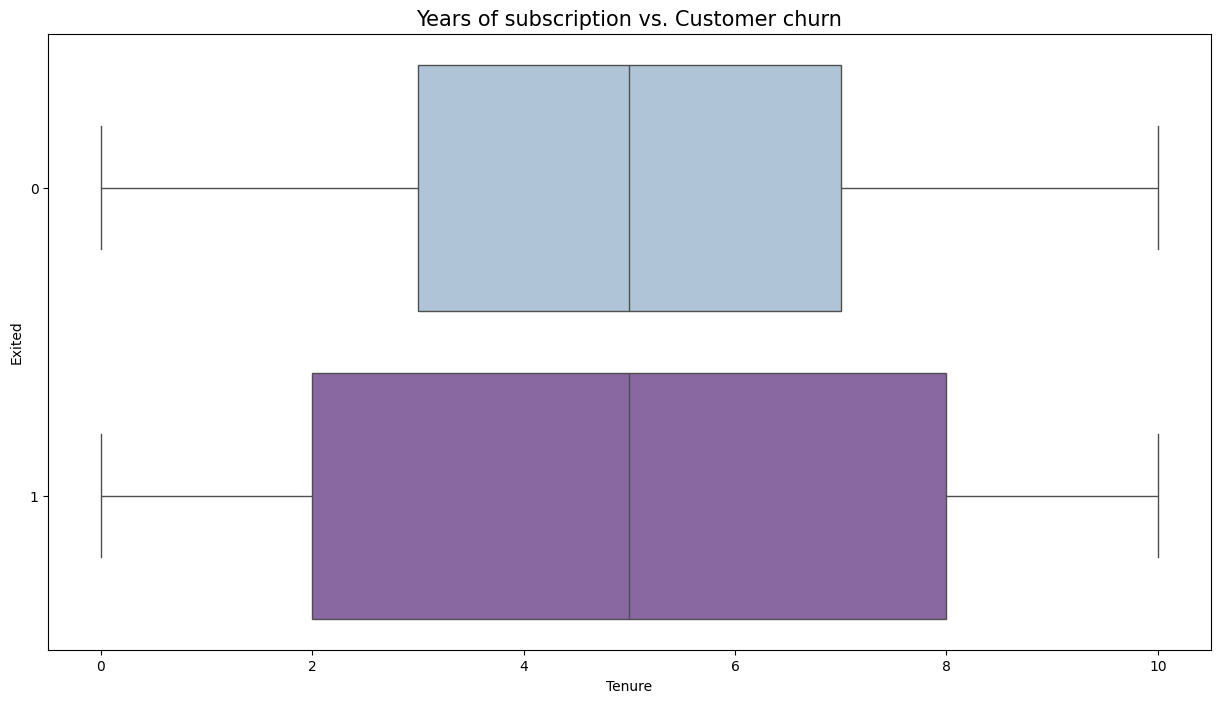

In [ ]:
plt.figure(figsize=(15,8))
f1 = sns.boxplot(x='Tenure', y='Exited', data=df, palette='BuPu', orient='h')
f1.set_title('Years of subscription vs. customer churn', fontsize=15);

The box plots for tenure are significantly overlapping between the churned and non-churned groups, indicating that tenure may not be a critical factor influencing customer churn.     

But let's check with a histogram where we can compare them in a detailed way.

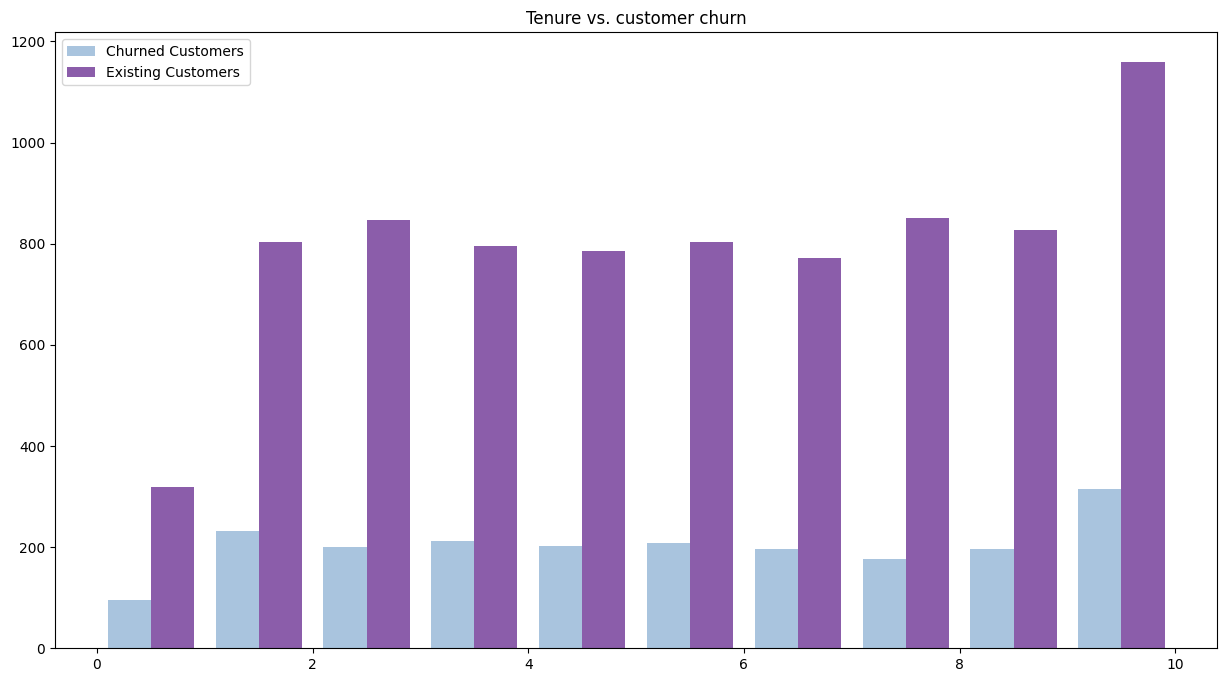

In [28]:
existing = df[df['Exited'] == 0]
churned = df[df['Exited'] == 1]
colors = sns.color_palette('BuPu', 2)

fig, ax = plt.subplots(figsize=(15,8))

ax.hist([churned['Tenure'], existing['Tenure']], color=colors)
ax.set_title('Tenure vs. customer churn')
ax.legend(('Churned Customers', 'Existing Customers'))

In [29]:
# check the correlation between Tenure and Exited
df[['Tenure', 'Exited']].corr()

,Tenure,Exited
Tenure,1.000000,-0.014001
Exited,-0.014001,1.000000


The correlation between `Tenure` and `Exited` is found to be at a significantly low level.

Consequently, our __initial hypothesis has been tested and found to be invalid.__ There is no significant relationship between tenure and exited, and therefore we cannot conclude that customers with higher tenure are less likely to churn.

__2. Customers with lower balances are more likely to churn.__

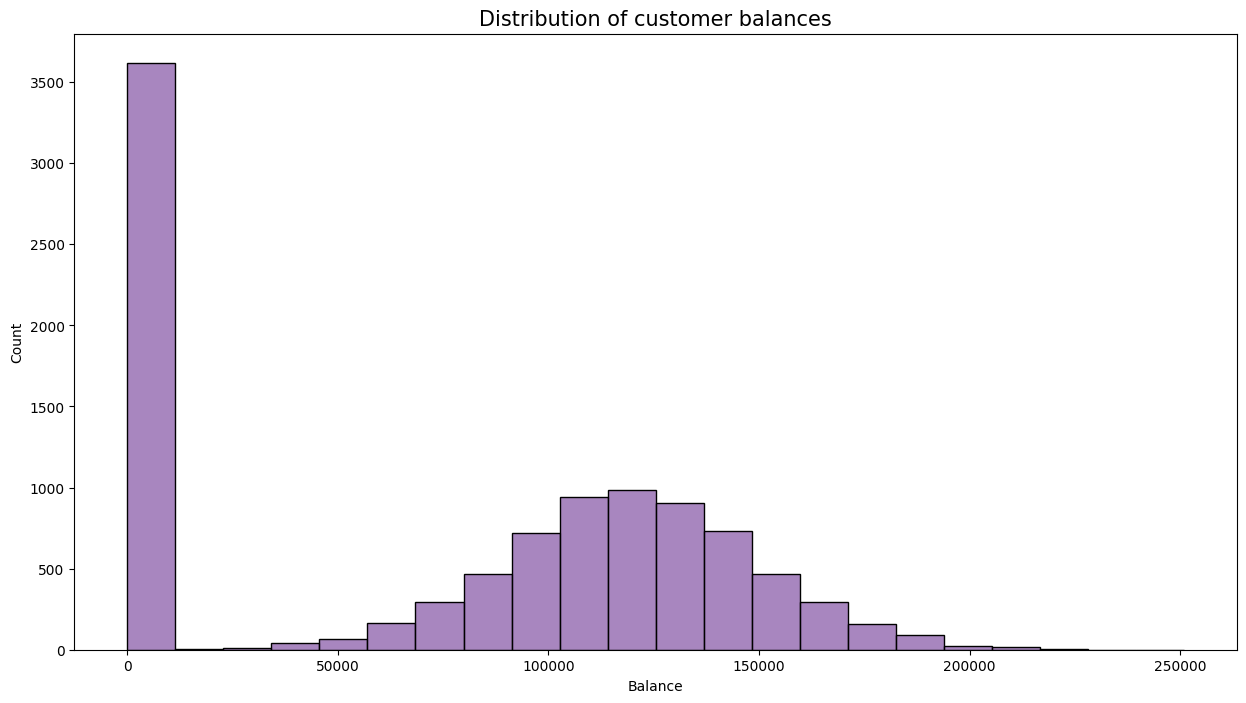

In [59]:
color = sns.color_palette('BuPu', 8)[5]

plt.figure(figsize=(15,8))
f1 = sns.histplot(x=df['Balance'], color=color) 
f1.tick_params(axis='x') 
f1.set(xlabel="Balance") 
f1.set_title('Distribution of customer balances', fontsize=15); 

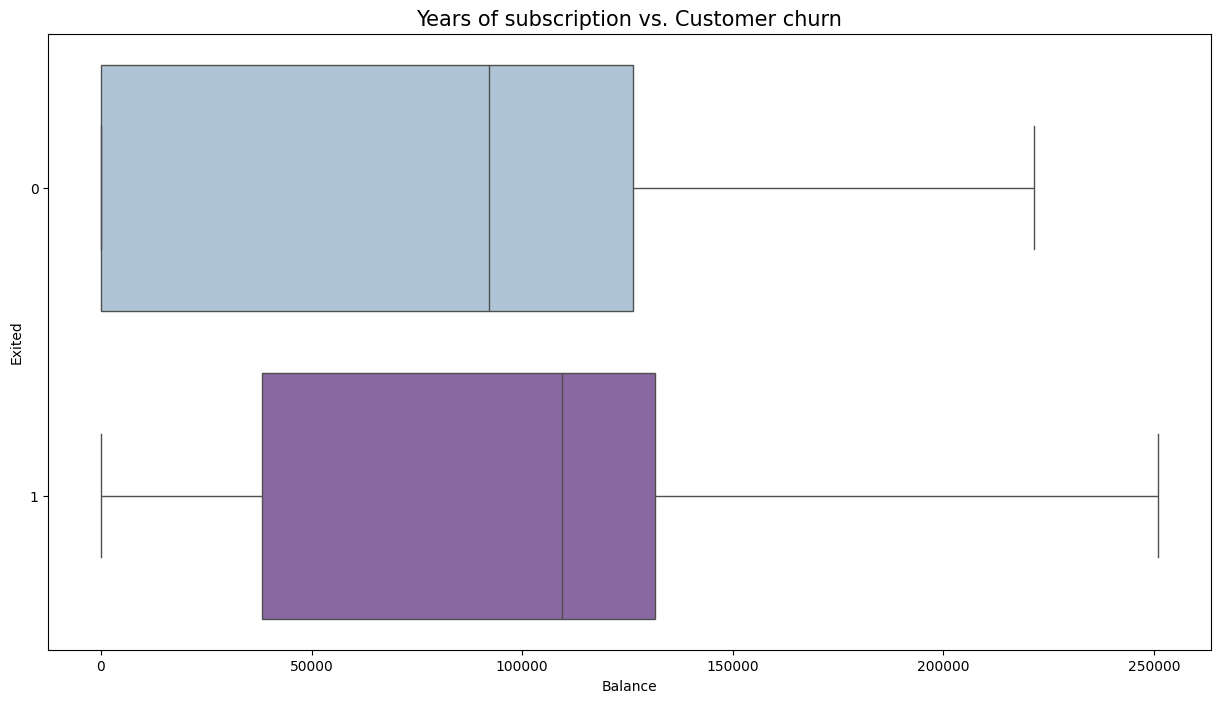

In [ ]:
plt.figure(figsize=(15,8))
f1 = sns.boxplot(x='Balance', y='Exited', data=df, palette='BuPu', orient='h')
f1.set_title('Customer balance vs. churn', fontsize=15);

While the comparison between 'Tenure' and 'Exited' differs slightly, the boxplots for `Balance` and `Exited` indicate a similar relationship between customer balance and subscription cancellation. 

To gain further insight, let's examine the relationship in detail.

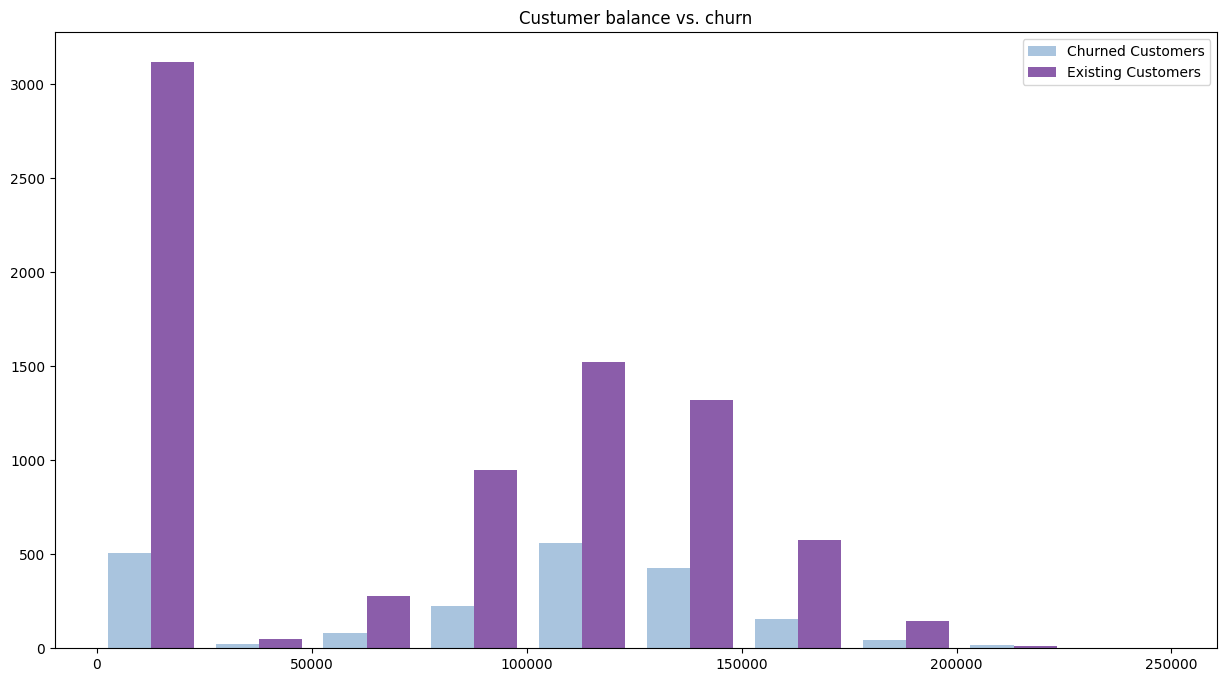

In [47]:
existing = df[df['Exited'] == 0]
churned = df[df['Exited'] == 1]
colors = sns.color_palette('BuPu', 2)

fig, ax = plt.subplots(figsize=(15,8))

ax.hist([churned['Balance'], existing['Balance']], color=colors)
ax.set_title('Custumer balance vs. churn')
ax.legend(('Churned Customers', 'Existing Customers'))

In [18]:
df[['Balance', 'Exited']].corr()

,Balance,Exited
Balance,1.000000,0.118533
Exited,0.118533,1.000000


While there is a slight positive correlation, it is not significant enough to be used as the sole determining factor in whether a customer will cancel their subscription. Furthermore, the findings align with the initial observations regarding the high number of customers with zero balances. 

However, __our second hypothesis has been disproven.__ Consequently, there is no evidence to suggest that customers with lower balances are more likely to churn.

__3. Customers with lower estimated salaries are more likely to churn.__

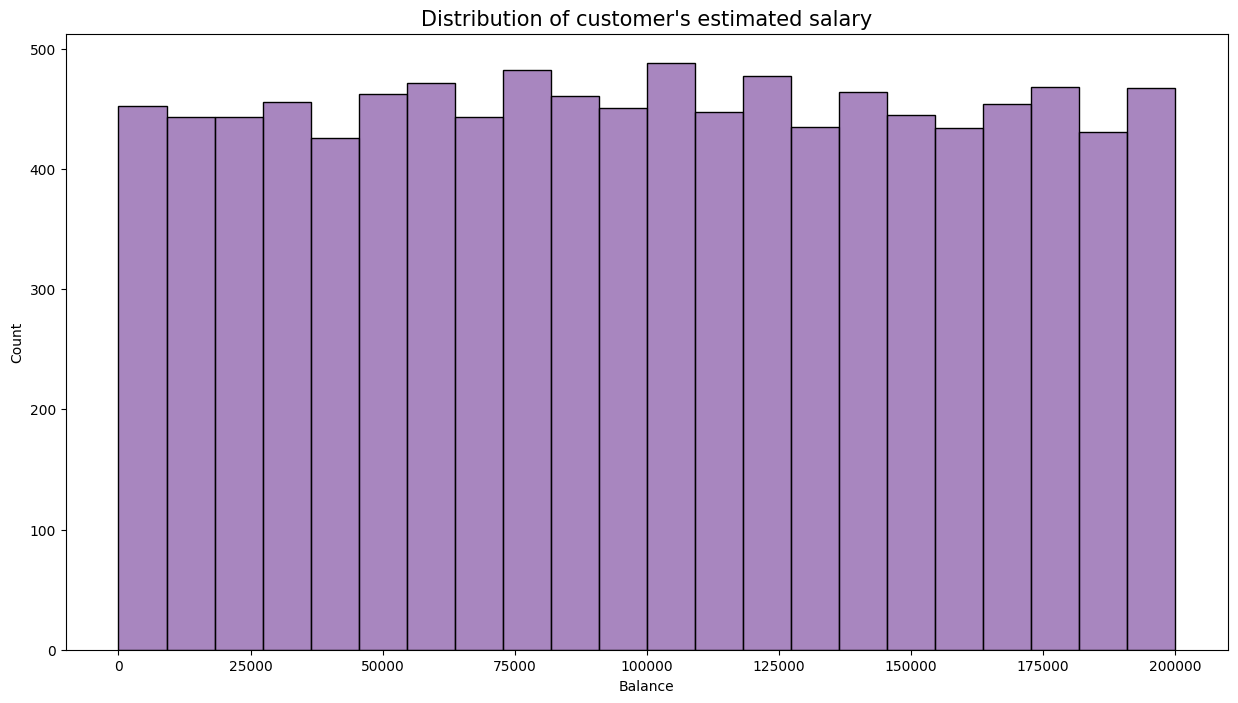

In [37]:
color = sns.color_palette('BuPu', 8)[5]

plt.figure(figsize=(15,8))
f1 = sns.histplot(x=df['EstimatedSalary'], color=color) 
f1.tick_params(axis='x') 
f1.set(xlabel="Balance") 
f1.set_title("Distribution of customer's estimated salary", fontsize=15); 

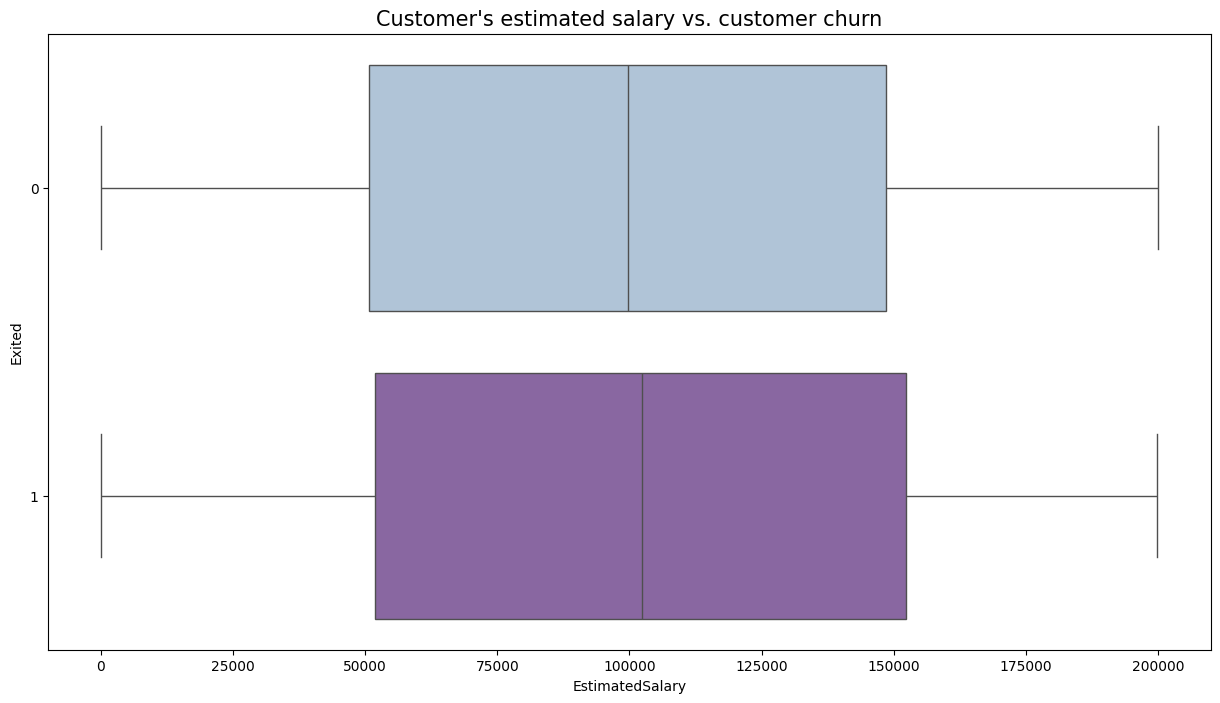

In [53]:
plt.figure(figsize=(15,8))
f1 = sns.boxplot(x='EstimatedSalary', y='Exited', data=df, palette='BuPu', orient='h')
f1.set_title("Customer's estimated salary vs. customer churn", fontsize=15);

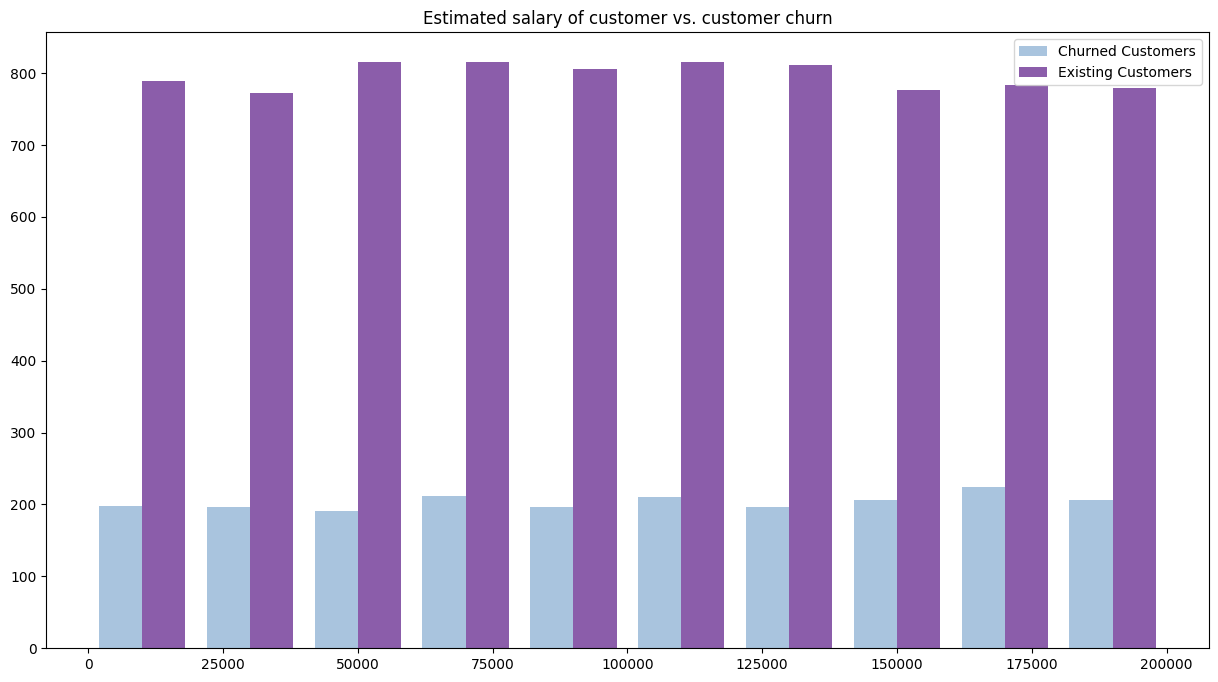

In [56]:
existing = df[df['Exited'] == 0]
churned = df[df['Exited'] == 1]
colors = sns.color_palette('BuPu', 2)

fig, ax = plt.subplots(figsize=(15,8))

ax.hist([churned['EstimatedSalary'], existing['EstimatedSalary']], color=colors)
ax.set_title('Estimated salary of customer vs. customer churn')
ax.legend(('Churned Customers', 'Existing Customers'))

In [57]:
df[['EstimatedSalary', 'Exited']].corr()

,EstimatedSalary,Exited
EstimatedSalary,1.000000,0.012097
Exited,0.012097,1.000000


The data indicates no significant correlation between the `EstimatedSalary` and `Exited` features. 

Consequently, our __third hypothesis is thus invalidated.__ There is no evidence to suggest that customers with lower estimated salaries are more likely to churn.

__4. Customers older than 35 are less likely to churn.__

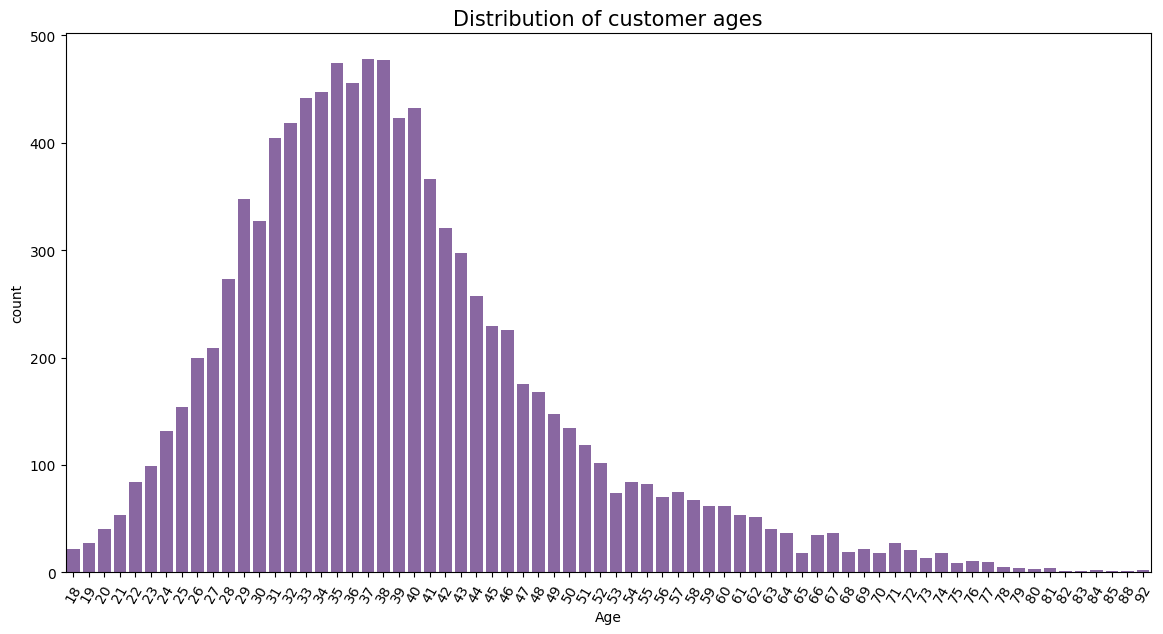

In [24]:
# plot the age distribution
color = sns.color_palette('BuPu', 8)[5]

plt.figure(figsize=(14,7))
f1 = sns.countplot(x=df['Age'], color=color) 
f1.tick_params(axis='x', labelrotation=60) 
f1.set(xlabel="Age") 
f1.set_title('Distribution of customer ages', fontsize=15); 

The graph illustrates that the majority of customers are between the ages of 31 and 40. Let's compare the `Age` and `Exited` features.

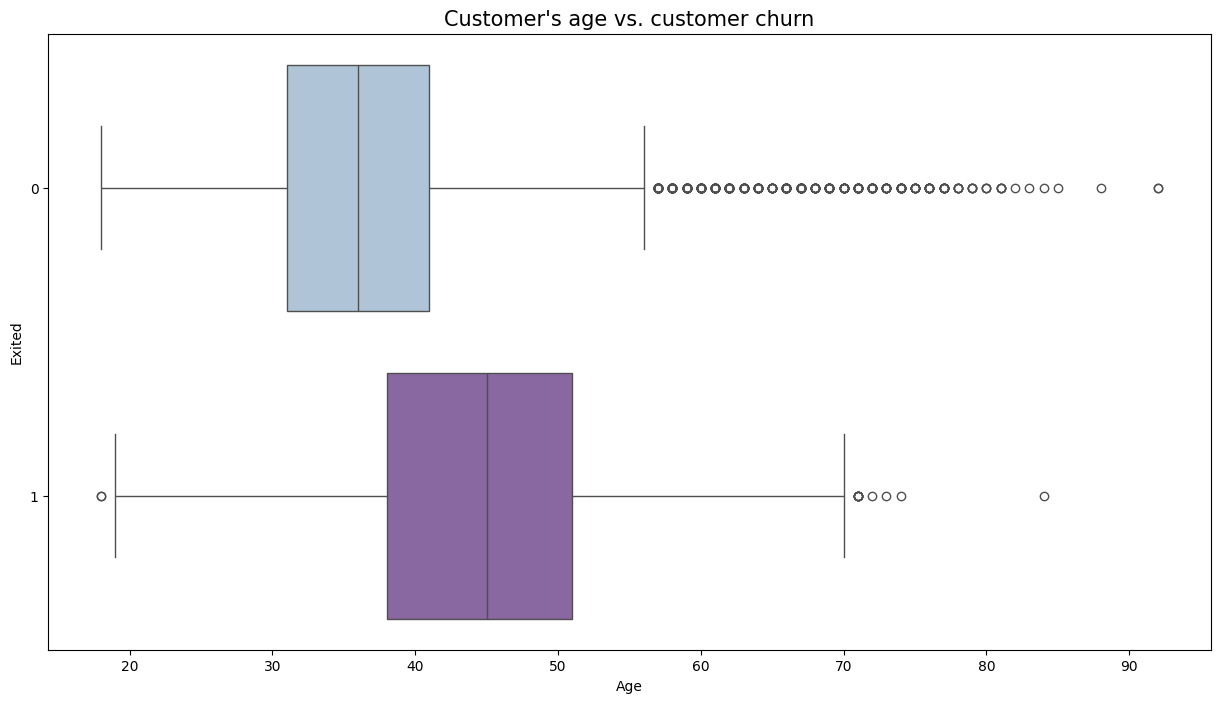

In [25]:
plt.figure(figsize=(15,8))
f1 = sns.boxplot(x='Age', y='Exited', data=df, palette='BuPu', orient='h')
f1.set_title("Customer's age vs. customer churn", fontsize=15);

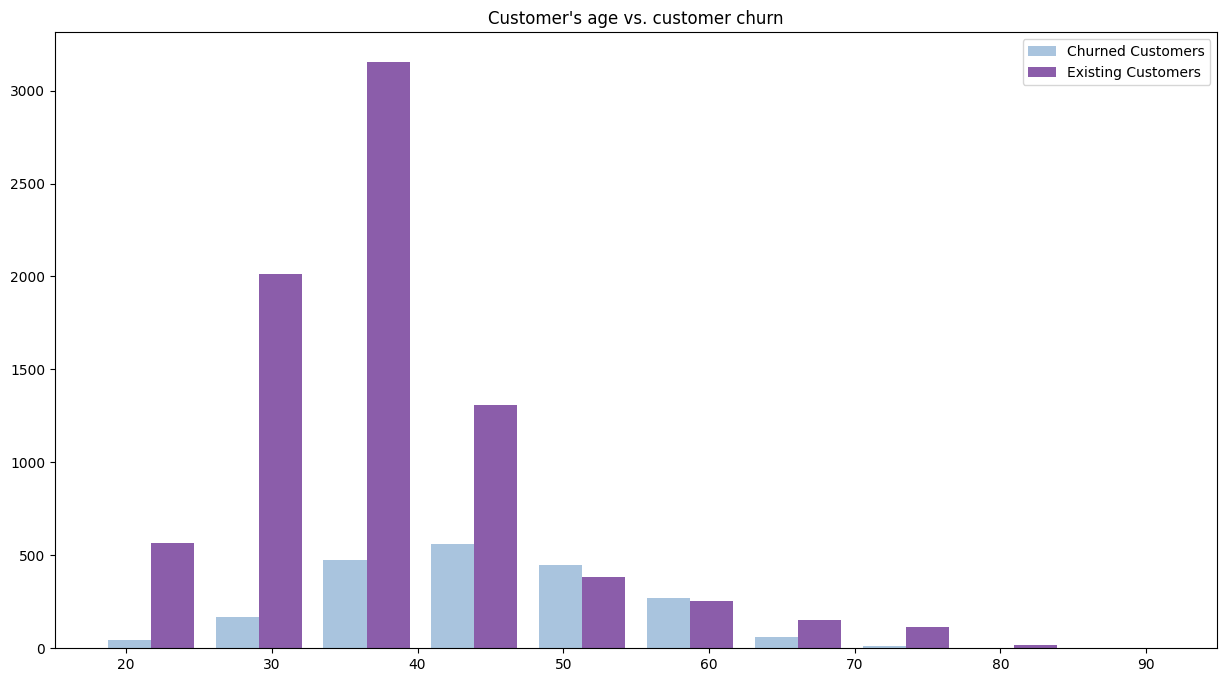

In [26]:
existing = df[df['Exited'] == 0]
churned = df[df['Exited'] == 1]
colors = sns.color_palette('BuPu', 2)

fig, ax = plt.subplots(figsize=(15,8))

ax.hist([churned['Age'], existing['Age']], color=colors)
ax.set_title("Customer's age vs. customer churn")
ax.legend(('Churned Customers', 'Existing Customers'))

In [38]:
df[['Age', 'Exited']].corr()

,Age,Exited
Age,1.000000,0.285323
Exited,0.285323,1.000000


The relationship between `Age` and `Exited` appears promising; however it is not strong enough to support our __fourth hypothesis.__

Consequently, there is no evidence to suggest that customers above the age of 35 are less likely to churn.

__5. Customers with higher credit scores are less likely to churn.__


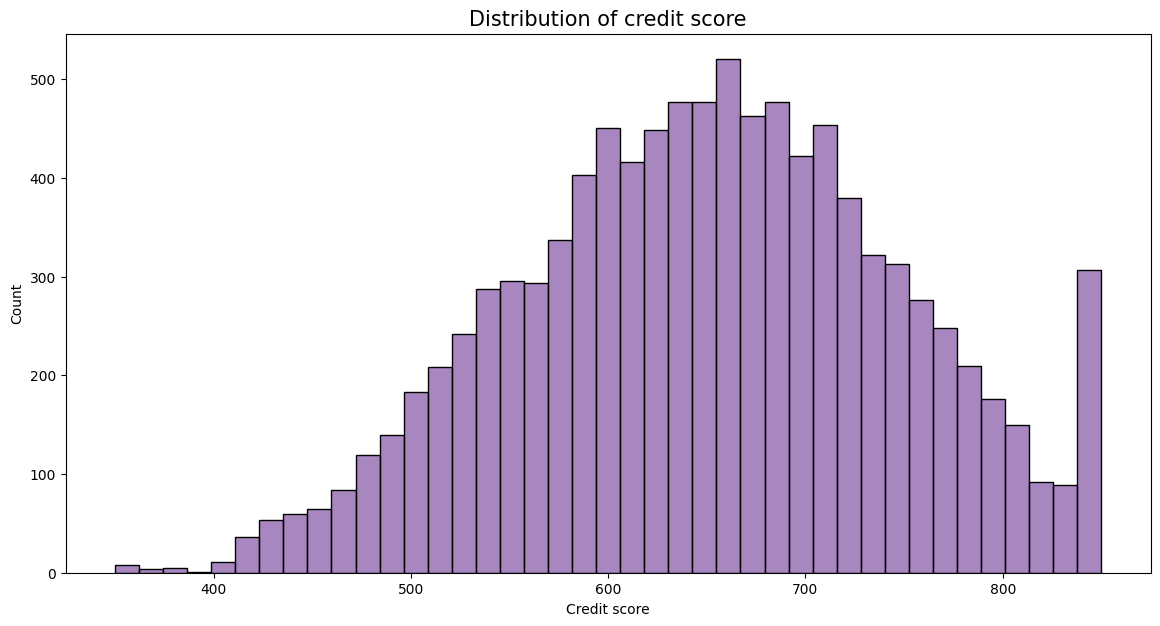

In [17]:
# plot the credit score distribution
color = sns.color_palette('BuPu', 8)[5]

plt.figure(figsize=(14,7))
f1 = sns.histplot(x=df['CreditScore'], color=color) 
f1.tick_params(axis='x') 
f1.set(xlabel="Credit score") 
f1.set_title('Distribution of credit score', fontsize=15);

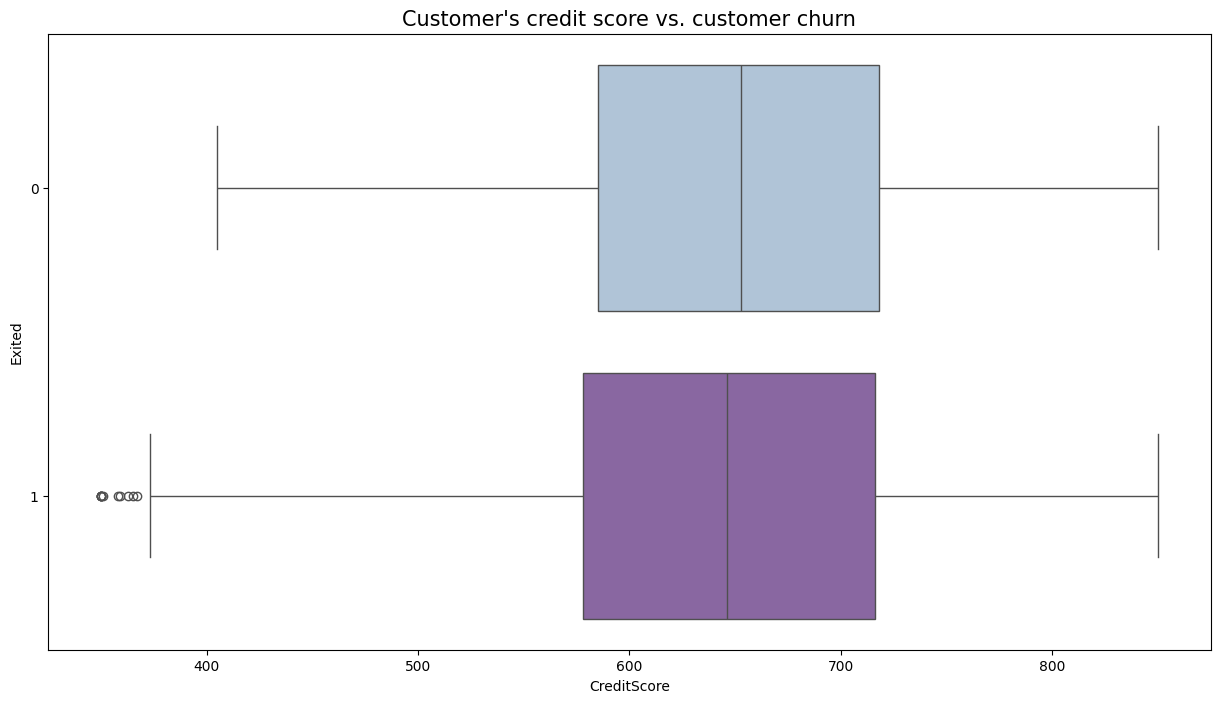

In [18]:
plt.figure(figsize=(15,8))
f1 = sns.boxplot(x='CreditScore', y='Exited', data=df, palette='BuPu', orient='h')
f1.set_title("Customer's credit score vs. customer churn", fontsize=15);

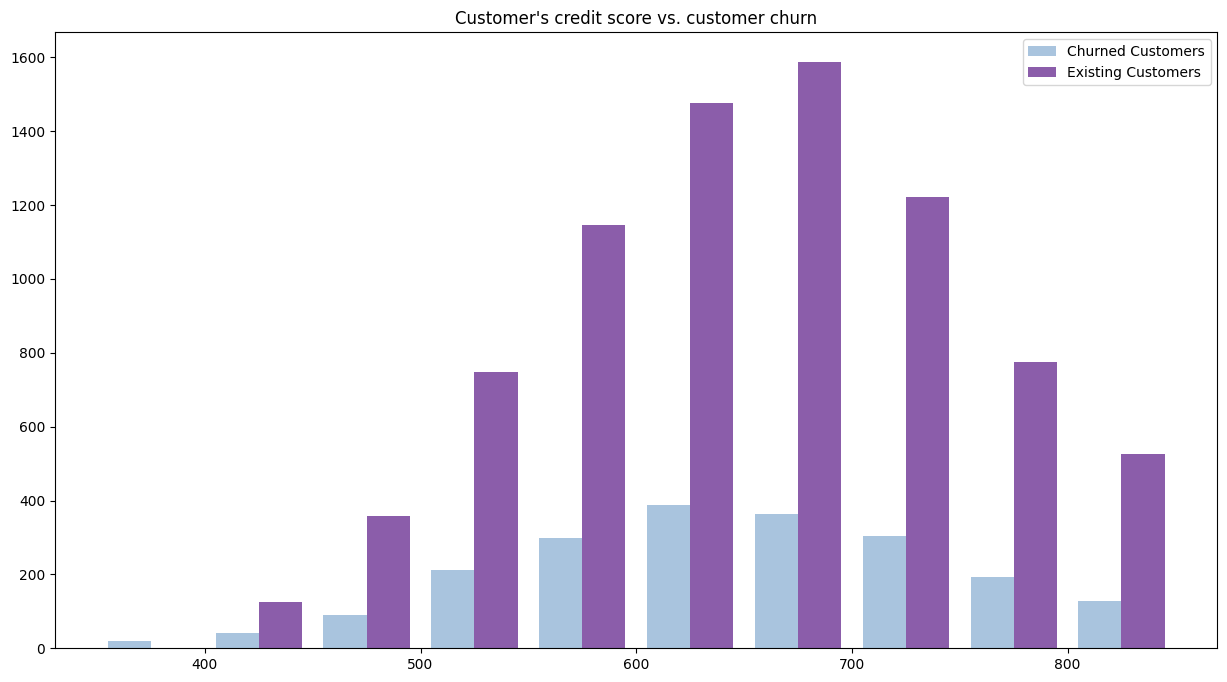

In [19]:
existing = df[df['Exited'] == 0]
churned = df[df['Exited'] == 1]
colors = sns.color_palette('BuPu', 2)

fig, ax = plt.subplots(figsize=(15,8))

ax.hist([churned['CreditScore'], existing['CreditScore']], color=colors)
ax.set_title("Customer's credit score vs. customer churn")
ax.legend(('Churned Customers', 'Existing Customers'))

In [20]:
df[['CreditScore', 'Exited']].corr()

,CreditScore,Exited
CreditScore,1.000000,-0.027094
Exited,-0.027094,1.000000


The data indicates no significant correlation between the `CreditScore` and `Exited` columns.

Therefore, our __fifth hypothesis is thus invalidated.__ There is no evidence to suggest that customers with higher credit scores are less likely to churn.

__6. Customer churn is less likely influenced by customer's gender.__   
__7. Customer churn is less likely influenced by the customer's geographic region of origin.__

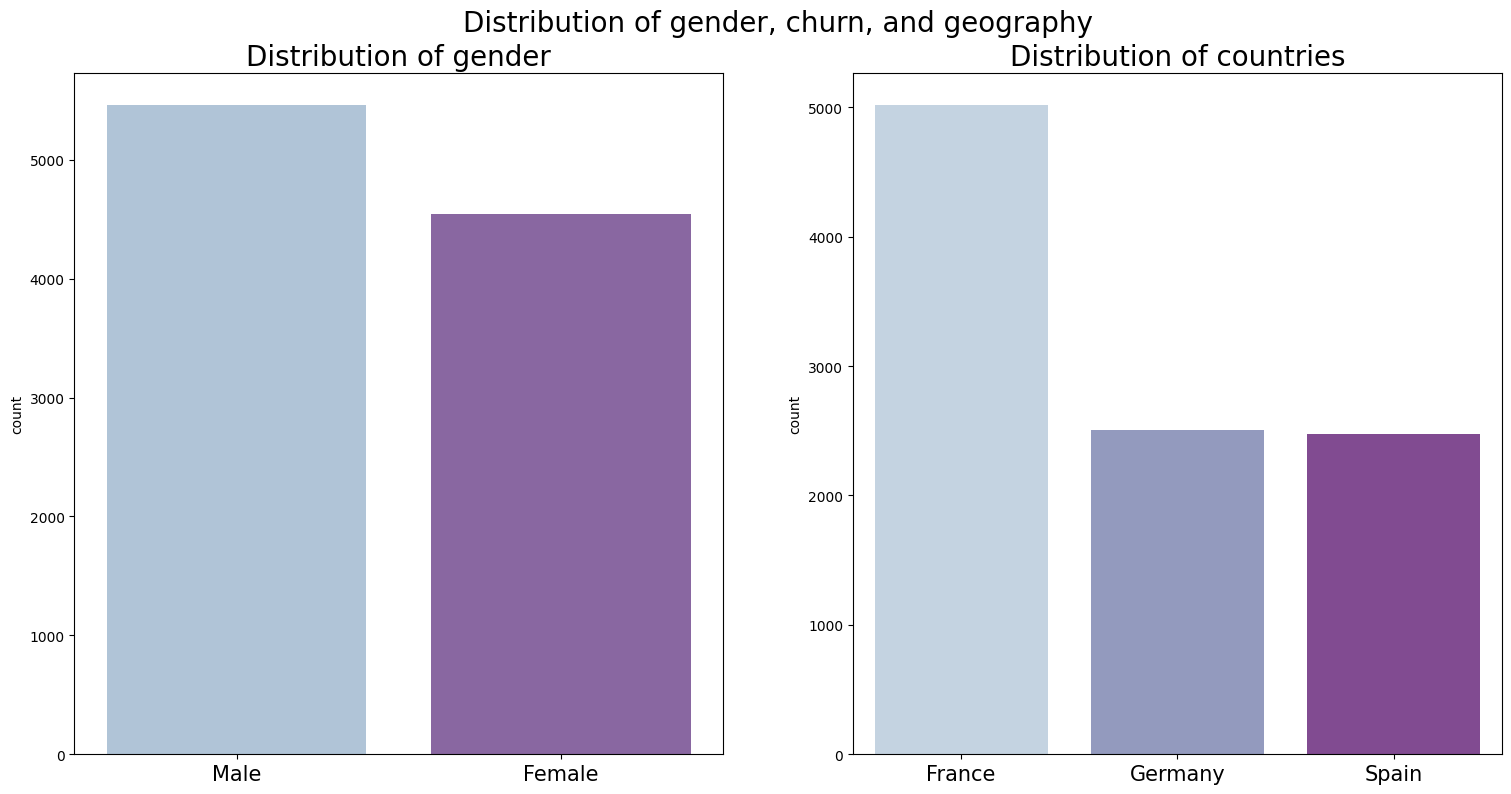

In [28]:
fig, ax = plt.subplots(1,2, figsize=(15,8)) 
plt.suptitle('Distribution of gender, churn, and geography', fontsize=20)
fig.tight_layout() 
plt.subplots_adjust(hspace = .5, wspace = .2, top = .9) 
 
f1 = sns.countplot(x=df['Gender'], ax=ax[0], palette='BuPu') 
f1.tick_params(axis='x', labelsize=15)
f1.set(xlabel=None) 
f1.set_title('Distribution of gender', fontsize=20); 
 
f2 = sns.countplot(x=df['Geography'], ax=ax[1], palette='BuPu') 
f2.tick_params(axis='x', labelsize=15)
f2.set(xlabel=None) 
f2.set_title('Distribution of countries', fontsize=20); 

In [34]:
df_copy.columns

Index(['CustomerId', 'CreditScore', 'Age', 'Tenure', 'Balance',
       'EstimatedSalary', 'Exited', 'Geography_Germany', 'Geography_Spain',
       'Gender_Male'],
      dtype='object')

It seems that most of our customers are from France, let's take a closer look at the features.

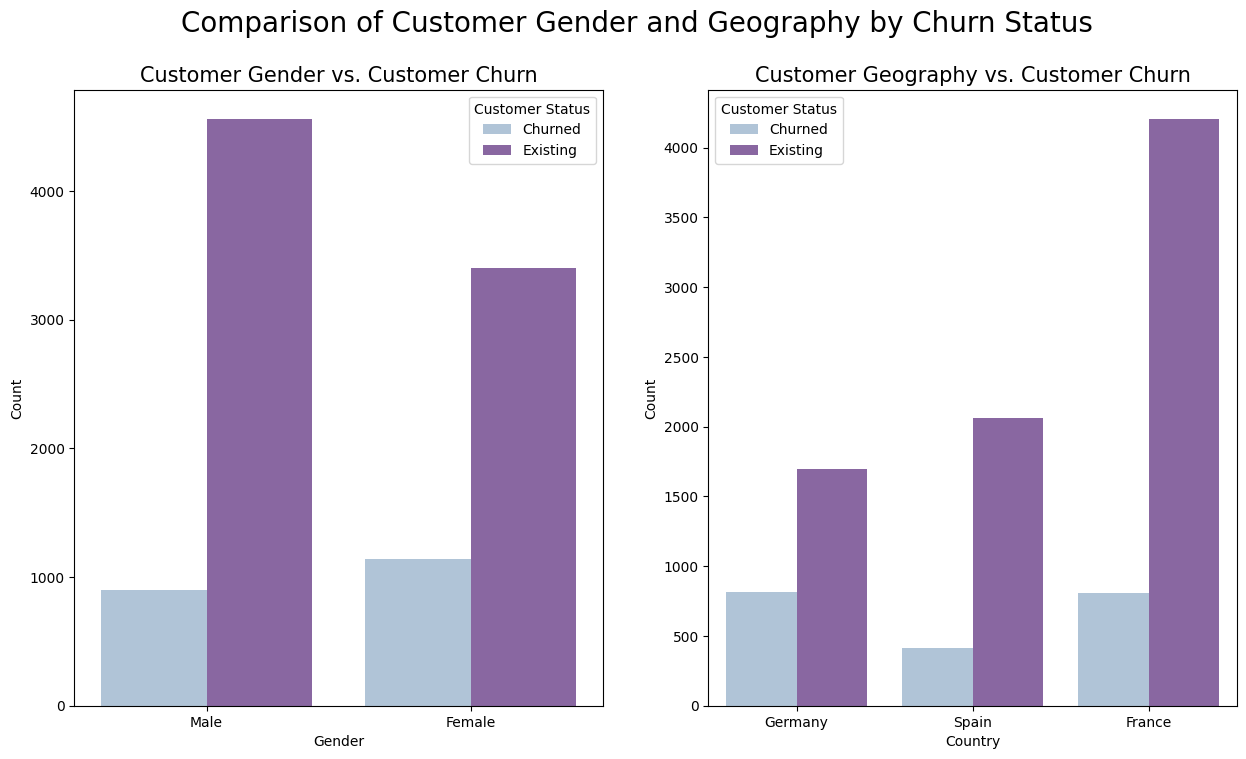

In [46]:
existing = df_copy[df_copy['Exited'] == 0]
churned = df_copy[df_copy['Exited'] == 1]
colors = sns.color_palette('BuPu', 2)

fig, ax = plt.subplots(1, 2, figsize=(15, 8))
plt.suptitle("Comparison of Customer Gender and Geography by Churn Status", fontsize=20)

# gender distribution
gender_counts = pd.DataFrame({
    'Gender': ['Male', 'Female'],
    'Churned': [churned['Gender_Male'].sum(), len(churned) - churned['Gender_Male'].sum()],
    'Existing': [existing['Gender_Male'].sum(), len(existing) - existing['Gender_Male'].sum()]
})
gender_counts = gender_counts.melt(id_vars='Gender', var_name='Status', value_name='Count')

sns.barplot(data=gender_counts, x='Gender', y='Count', hue='Status', palette=colors, ax=ax[0])
ax[0].set_title("Customer Gender vs. Customer Churn", fontsize=15)
ax[0].set_ylabel('Count')
ax[0].set_xlabel('Gender')
ax[0].legend(title='Customer Status')

# geography distribution
geo_counts = pd.DataFrame({
    'Geography': ['Germany', 'Spain', 'France'],
    'Churned': [
        churned['Geography_Germany'].sum(),
        churned['Geography_Spain'].sum(),
        len(churned) - churned['Geography_Germany'].sum() - churned['Geography_Spain'].sum()
    ],
    'Existing': [
        existing['Geography_Germany'].sum(),
        existing['Geography_Spain'].sum(),
        len(existing) - existing['Geography_Germany'].sum() - existing['Geography_Spain'].sum()
    ]
})
geo_counts = geo_counts.melt(id_vars='Geography', var_name='Status', value_name='Count')

sns.barplot(data=geo_counts, x='Geography', y='Count', hue='Status', palette=colors, ax=ax[1])
ax[1].set_title("Customer Geography vs. Customer Churn", fontsize=15)
ax[1].set_ylabel('Count')
ax[1].set_xlabel('Country')
ax[1].legend(title='Customer Status')


The proportion of churned customers appears similar for both males and females. While the total number of male customers is slightly higher than females, the churn rate seems consistent across genders. Based on this visualization, gender does not appear to have a strong influence on customer churn.

There are noticeable differences in churn proportions across regions: Germany may exhibit a higher churn rate relative to the other regions, while Spain and France seem to have lower churn rates.

This indicates that geographic region might influence churn, particularly in Germany. Seventh hypothesis could be rejected unless statistical testing (e.g., chi-square test or proportion tests) indicates no significant association between churn and geographic region.

Let's do the chi-square testing for `Gender` and `Geography` features.

In [48]:
gender_contingency = pd.crosstab(df_copy['Gender_Male'], df_copy['Exited'])
chi2, p, dof, expected = chi2_contingency(gender_contingency)
print(f"Chi-Square Test for Gender: p-value = {p}")

Chi-Square Test for Gender: p-value = 2.2482100097131755e-26


In [49]:
geo_contingency = pd.crosstab(df_copy[['Geography_Germany', 'Geography_Spain']].idxmax(axis=1), df_copy['Exited'])
chi2, p, dof, expected = chi2_contingency(geo_contingency)
print(f"Chi-Square Test for Geography: p-value = {p}")

Chi-Square Test for Geography: p-value = 1.6239910333565774e-07


As the p-values for `Gender` and `Geography` are greater than 0.05, we can confirm that our __sixth and seventh hypotheses are validated.__     
Consequently, it is accurate to conclude that customer churn is less likely to be influenced by a customer's geographical location or gender.